<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow/Probabilistic/Distributions/Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Distributions

## Coding Tutorials
#### 1. [Univariate Distributions](#univariate_distributions)
#### 2. [Multivariate Distributions](#multivariate_distributions)
#### 3. [The Independent Distribution](#the_independent_distribution)
#### 4. [Sampling and log probs](#sampling_and_log_probs)
#### 5. [Trainable Distributions](#trainable_distributions)

***
## Univariate distributions
<a id='univariate_distributions'></a>

Distribution: tfp.distributions.Normal("Normal", batch_shape=[3], event_shape=[], dtype=float32)


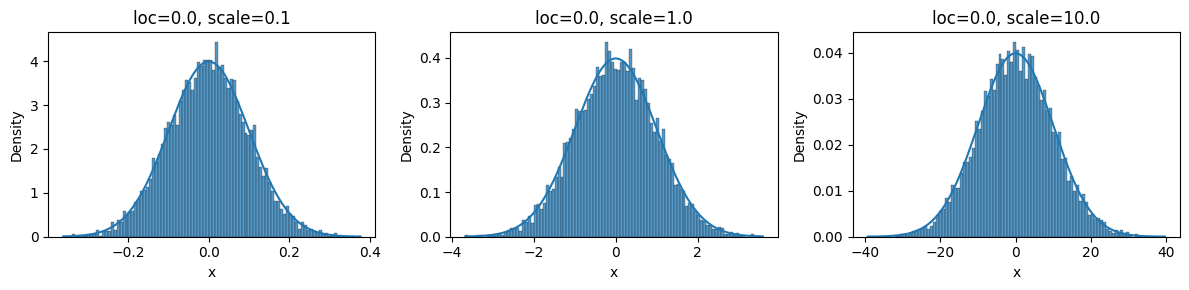

In [15]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.keras.utils.set_random_seed(seed=42)
import matplotlib.pyplot as plt
import seaborn as sns

# Create a normal distribution from Tensorflow Distributions
uvNormal = tfp.distributions.Normal(loc=[0], scale=[0.1, 1, 10])
print("Distribution:", uvNormal)
# Sample multiple times from the chosen distribution...
samples = uvNormal.sample(sample_shape=10000)
# Obtain value of probability's density
pdf = uvNormal.prob(value=samples)

# Plot a histogram, approximating the density
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
locs = uvNormal.loc.numpy()
scales = uvNormal.scale.numpy()
for i, ax in enumerate(axes):
    sns.histplot(ax=ax, x=samples[:, i], bins=100, stat="density")
    sns.lineplot(ax=ax, x=samples[:, i], y=pdf[:, i])
    ax.set_title(label=f"loc={locs[0]:.1f}, scale={scales[i]:.1f}")
    ax.set_xlabel(xlabel="x")
fig.tight_layout()
plt.show()

#### Work with batch distributions

Distribution: tfp.distributions.Bernoulli("Bernoulli", batch_shape=[3], event_shape=[], dtype=int32)


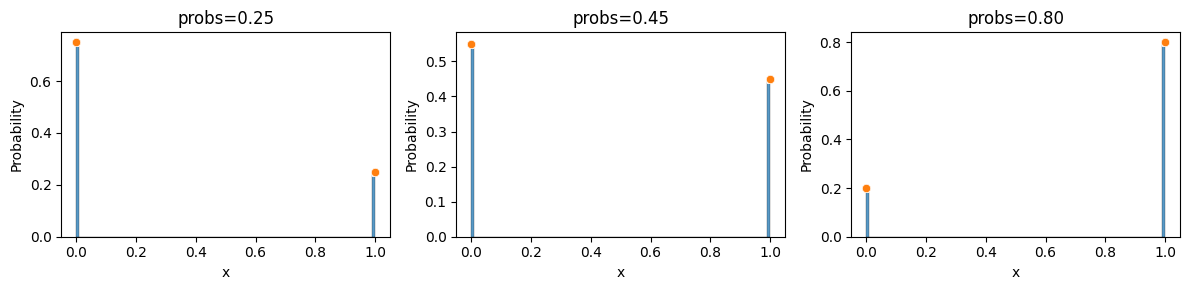

In [10]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.keras.utils.set_random_seed(seed=42)
import matplotlib.pyplot as plt
import seaborn as sns

# Create a batched Bernoulli distribution (discrete)
uvBernoulli = tfp.distributions.Bernoulli(probs=[0.25, 0.45, 0.8])
print("Distribution:", uvBernoulli)
# Sample from this batch of distributions
samples = uvBernoulli.sample(sample_shape=10000)
# Determine probabilities from this batch distribution
pmf = uvBernoulli.prob(value=samples)

# Plot a histogram, approximating the density
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
probs = uvBernoulli.probs
for i, ax in enumerate(axes):
    sns.histplot(ax=ax, x=samples[:, i], bins=100, stat="probability")
    sns.scatterplot(ax=ax, x=samples[:, i], y=pmf[:, i])
    ax.set_title(label=f"probs={probs[i]:.2f}")
    ax.set_xlabel(xlabel="x")
fig.tight_layout()
plt.show()

***
<a id='multivariate_distributions'></a>
## Multivariate Distributions


#### Batches of multivariate distributions

Distribution: tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[3], event_shape=[2], dtype=float32)


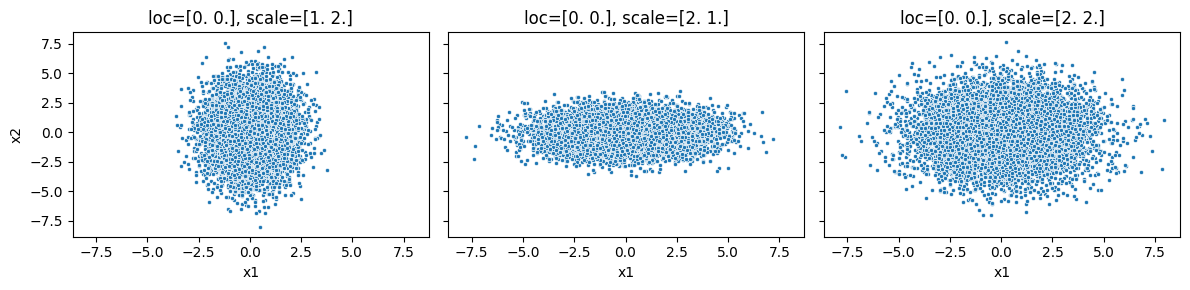

In [13]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.keras.utils.set_random_seed(seed=42)
import matplotlib.pyplot as plt
import seaborn as sns

# Define 2D multivariate Gaussian with diagonal covariance matrix
# Create three "batches" of multivariate normals
mvNormal = tfp.distributions.MultivariateNormalDiag(
    loc=[[0, 0]], scale_diag=[[1, 2], [2, 1], [2, 2]])
print("Distribution:", mvNormal)

# Create a sample for a plot -- notice the shape
samples = mvNormal.sample(sample_shape=10000)

# Plot samples from the batched multivariate Gaussian
fig, axes = plt.subplots(nrows=1, ncols=3,
    sharex=True, sharey=True, figsize=(12, 3))
locs = mvNormal.loc.numpy()
scales = mvNormal.scale.diag.numpy()
for i, ax in enumerate(axes):
    # take the ith batch [samples x event_shape]
    sample = samples[:, i, :]
    sns.scatterplot(ax=ax, x=sample[:, 0], y=sample[:, 1], marker=".")
    ax.set_title(label=f"loc={locs[0]}, scale={scales[i]}")
    ax.set_xlabel(xlabel="x1")
    ax.set_ylabel(ylabel="x2")
fig.tight_layout()
plt.show()



***
<a id='the_independent_distribution'></a>
## The Independent Distribution

Distribution: tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)


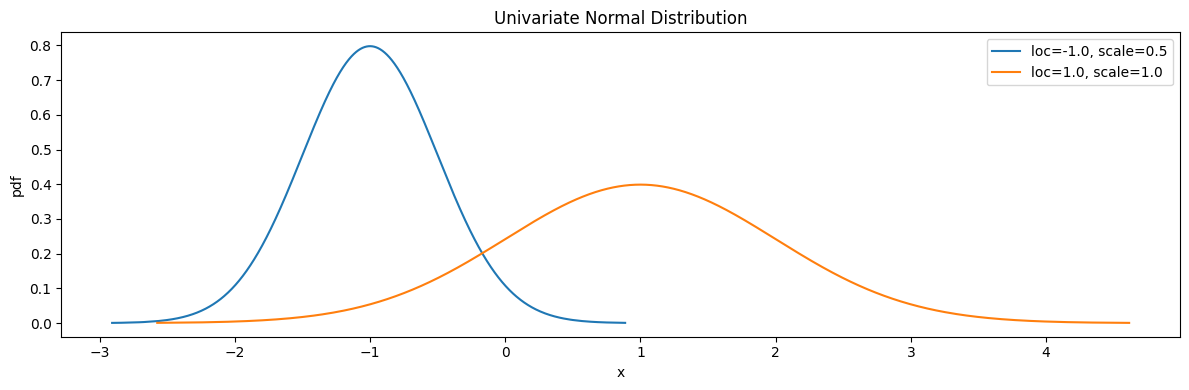

Distribution: tfp.distributions.Independent("IndependentNormal", batch_shape=[], event_shape=[2], dtype=float32)


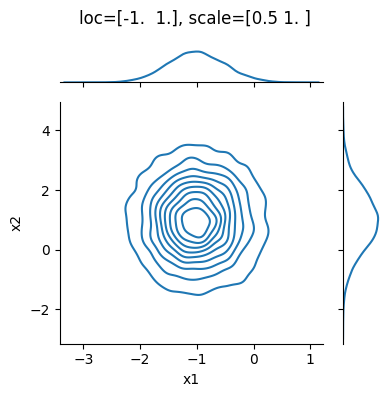

In [23]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import seaborn as sns

# Start by defining a batch of two univariate Gaussians, then
# combine them into a bivariate Gaussian with independent components
uvNormal = tfp.distributions.Normal(loc=[-1, 1], scale=[0.5, 1])
# Check the distribution
print("Distribution:", uvNormal)
# Univariate density functions
# each column is a vector of densities for one distribute normal
samples = uvNormal.sample(sample_shape=10000)
pdf = uvNormal.prob(value=samples)

plt.figure(figsize=(12, 4))
locs = uvNormal.loc.numpy()
scales = uvNormal.scale.numpy()
for i in range(2):
    sns.lineplot(x=samples[:, i], y=pdf[:, i],
        label=f"loc={locs[i]:.1f}, scale={scales[i]:.1f}")
plt.title(label="Univariate Normal Distribution")
plt.ylabel(ylabel="pdf")
plt.xlabel(xlabel="x")
plt.legend()
plt.tight_layout()
plt.show()

# Summarise how Independent has been used
# Use Independent to convert the batch shape to the event shape
idNormal = tfp.distributions.Independent(
    distribution=uvNormal, reinterpreted_batch_ndims=1)
# Note that dimension from batch_shape has shifted to event_shape
print("Distribution:", idNormal)
# Create a plot showing joint density contours and marginal density functions
samples = idNormal.sample(sample_shape=10000)

g = sns.jointplot(x=samples[:, 0], y=samples[:, 1], kind="kde", height=4)
g.fig.suptitle(t=f"loc={locs}, scale={scales}")
g.set_axis_labels(xlabel="x1", ylabel="x2")
plt.tight_layout()
plt.show()

#### Shifting batch dimensions to event dimensions using
`reinterpreted_batch_ndims`

In [9]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
import tensorflow_probability as tfp

# Demonstrate use of reinterpreted batch ndims
uvNormal = tfp.distributions.Normal(
    loc=[[-1], [0], [1]],
    scale=[1, 10])
print("Univariate Distribution:", uvNormal)

idNormal = tfp.distributions.Independent(
    distribution=uvNormal, reinterpreted_batch_ndims=2)
print("Independent Distribution:", idNormal)

sample = tf.random.normal(shape=[10, 3, 2])
prob = idNormal.prob(value=sample)
print(f"Sample shape {sample.shape}, Prob shape {prob.shape}")

Univariate Distribution: tfp.distributions.Normal("Normal", batch_shape=[3, 2], event_shape=[], dtype=float32)
Independent Distribution: tfp.distributions.Independent("IndependentNormal", batch_shape=[], event_shape=[3, 2], dtype=float32)
Sample shape (10, 3, 2), Prob shape (10,)


***
<a id='sampling_and_log_probs'></a>
## Sampling and log probs

In [2]:
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
import tensorflow_probability as tfp

# Multivariate Normal batched Distribution
# We are broadcasting batch shapes of `loc` and `scal_diag`
# against each other

loc = tf.constant(value=[
    [[0.3, 1.5, 1], [0.2, 0.4, 2.8]],
    [[2., 2.3, 8], [1.4, 1, 1.3]]
], dtype=tf.float32) # (2, 2, 3)

scale_diag = tf.constant(value=[0.4, 1, 0.7], dtype=tf.float32) # (3,)

mvNormal = tfp.distributions.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
print(mvNormal)

# Use independent to move part of the batch shape
idNormal = tfp.distributions.Independent(distribution=mvNormal,
    reinterpreted_batch_ndims=1)
print(idNormal)

# `[S, b, e]` shaped input, where [b, e] is broadcastable over [B, E]
sample = tf.random.uniform(shape=(10, 1, 2, 1))
print("Prob shape:", idNormal.log_prob(value=sample).shape)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[2, 2], event_shape=[3], dtype=float32)
tfp.distributions.Independent("IndependentMultivariateNormalDiag", batch_shape=[2], event_shape=[2, 3], dtype=float32)
Prob shape: (10, 2)


***
<a id='trainable_distributions'></a>
## Trainable Distributions

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


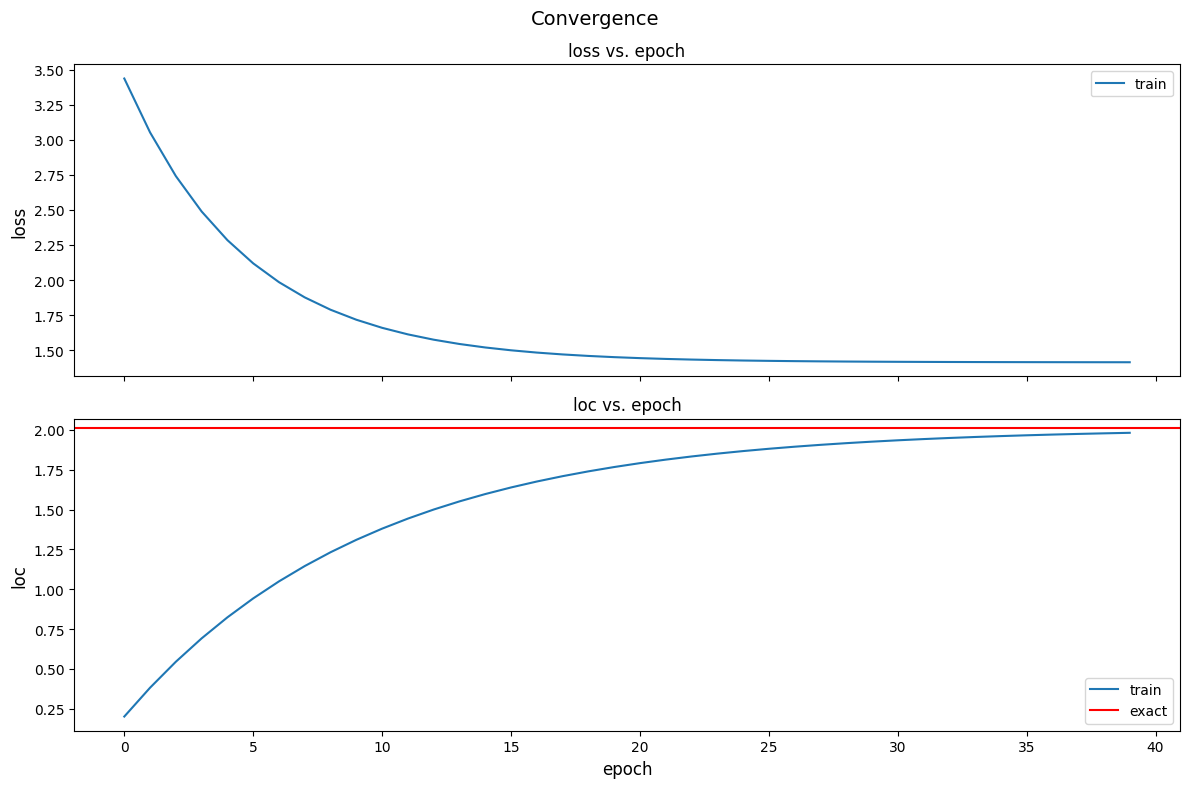

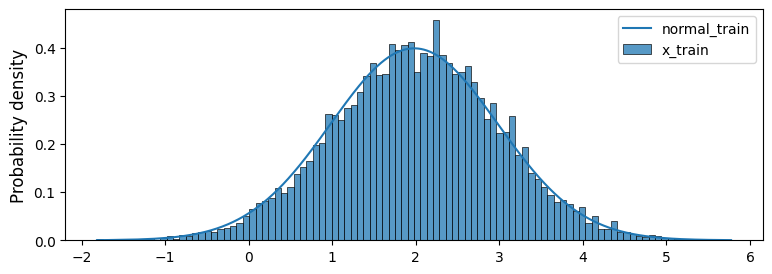

In [3]:
import tensorflow as tf
import tensorflow_probability as tfp
tf.keras.utils.set_random_seed(seed=42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_train = tf.random.normal(shape=(10000,), mean=2., stddev=1.)
x_train_mean = tf.math.reduce_mean(input_tensor=x_train)

with tf.distribute.MirroredStrategy().scope():
    normal = tfp.distributions.Normal(
        loc=tf.Variable(0., name='loc'), scale=1.)

    @tf.function
    def nll(x):
        return -tf.math.reduce_mean(input_tensor=normal.log_prob(value=x))
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
    @tf.function
    def train(x):
        with tf.GradientTape() as tape:
            loss = nll(x=x)
        grads = tape.gradient(target=loss, sources=normal.trainable_variables)
        optimizer.apply_gradients(grads_and_vars=zip(
            grads, normal.trainable_variables))
        return loss

history = {"train_loss": [], "train_loc": []}
for _ in range(40):
    loss = train(x=x_train)
    history["train_loss"].append(loss.numpy())
    history["train_loc"].append(normal.loc.numpy())

df_history = pd.DataFrame(history)
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))
fig.suptitle(t="Convergence", fontsize=14)
for ax, metric in zip(axes, ["loss", "loc"]):
    sns.lineplot(ax=ax, data=df_history, label="train",
        x=df_history.index, y=f"train_{metric}")
    ax.set_ylabel(ylabel=f"{metric}", fontsize=12)
    ax.set_title(label=f"{metric} vs. epoch")
plt.axhline(y=x_train_mean, label="exact", color="red")
plt.xlabel(xlabel="epoch", fontsize=12)
plt.legend(loc="best")
fig.tight_layout()
plt.show()

plt.figure(figsize=(9, 3))
x = x_train.numpy()
sns.histplot(x=x, stat="density", bins=100, label="x_train")
sns.lineplot(x=x, y=normal.prob(value=x), label="normal_train")
plt.ylabel(ylabel="Probability density", fontsize=12)
plt.legend(loc="best")
plt.show()

## Naive Bayes classifier

### Introduction to `newsgroups` data set

In this tutorial, just load the dataset, fetch train/test splits, probably choose a subset of the data.

Construct the class conditional feature distribution (with Independent, using the Naive Bayes assumption) and sample from it.

We can just use the ML estimates for parameters, in later tutorials we will learn them.

In [4]:
from sklearn import datasets

newsgrp = datasets.fetch_20newsgroups(data_home="data/newsgrp")
print(newsgrp["DESCR"])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

In [8]:
# Convenience function for retrieving the 20 newsgroups data set
# Usenet was a forerunner to modern internet forums
# Users could post and read articles
# Newsgroup corresponded to a topic
# Example topics in this data set: IBM computer hardware, baseball
# Our objective is to use an article's contents to predict its newsgroup,
# a 20-class classification problem.
# 18000 newsgroups, posts on 20 topics

from sklearn import datasets
import numpy as np
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)




def get_ds(x, y, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices(tensors=(x, y)).cache()
    if shuffle:
        ds = ds.shuffle(buffer_size=len(y))
    ds = ds.batch(batch_size=64)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

target_names = {}
for i, n in enumerate(newsgrp["target_names"]):
    target_names[i] = n

# Get the data
newsgrp_train = datasets.fetch_20newsgroups(subset="train",
    data_home="data/newsgrp")
x_train, y_train = newsgrp_train["data"], newsgrp_train["target"]
y_train = np.vectorize(target_names.get)(y_train)

ds_train = get_ds(x=x_train, y=y_train, shuffle=True)
for x, y in ds_train.take(count=1):
    print(x.shape, y.shape)

# newsgrp_test = datasets.fetch_20newsgroups(subset="test",
#     data_home="data/newsgrp")
# x_test, y_test = newsgrp_test["data"], newsgrp_test["target"]
# y_test = np.vectorize(target_names.get)(y_test)

# # Example article
# print("x_train:", x_train[100])
# # Associated label
# print("y_train:", y_train[100])

(64,) (64,)


In [17]:
import os
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)

vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=56365,
    standardize='lower_and_strip_punctuation', output_mode='int')
vectorize_layer.adapt(x_train)
vectorize_layer(x_train[100])

In [2]:
from sklearn import feature_extraction

# Preprocessing boilerplate
n_docs = len(x_train)
print("# documents:", n_docs)
n_classes = y_train.max() + 1
print("# classes:", n_classes)

# Ignore common words, words that appear once
count_vec = feature_extraction.text.CountVectorizer(
    input="content", binary=True, max_df=0.25, min_df=1.01/n_docs)
# Input is a list of strings
x_train = count_vec.fit_transform(raw_documents=x_train)

n_words = x_train.shape[1]
print("# words:", n_words)
# Check that the fit has been successful
count_vec.inverse_transform(x_train[100, :])

# documents: 11314
# classes: 20
# words: 56365


[array(['15', 'mail', 'call', '11', 'distribution', 'usa', 'bit', 'price',
        '120', 'post', '14', 'system', 'software', 'code', 'many', '12',
        'state', '20', 'installation', '16', '32', 'ibm', 'available',
        '10', '13', 'ohio', 'source', '30', 'assembly', 'lee', 'forsale',
        '80', '50', '01', '39', 'library', 'application', 'applications',
        '100', '35', 'either', '250', '17', 'dos', 'windows', 'resource',
        'lots', 'him', 'views', '75', 'chen', '65', '70', '90', '95',
        'unregistered', 'friend', 'microsoft', 'books', 'borland',
        'magnus', 'acs', 'tsung', 'kun', 'magnusug', '614', '791', 'drop',
        'publishing', 'ocr', 'compiler', 'debugger', 'whitewater',
        'toolkit', 'glockenspiel', 'commonview', 'framework',
        'spontaneous', 'macro', 'sdk', 'documentation', '125', 'foxpro',
        'wordperfect', 'developer', 'generator', 'liant', '195', 'os',
        'symantec', 'timeline', 'professional', 'negotiable'], dtype='<U80

#### A Naive Bayes classifier for `newsgroup`

Each feature vector $x$ is a list of indicators for whether a word appears in the article. $x_i$ is 1 if the $i$th word appears, and 0 otherwise. `inv_vocab` matches word indices $i$ to words.

Each label $y$ is a value in $0, 1, \ldots, 19$.

The parts of a naive Bayes classifier for this problem can be summarised as:  


- A probability distribution for the feature vector by class, $p(x|y = j)$ for each $j = 0, 1, \ldots, 19$. These probability distributions are assumed to have independent components: we can factorize the joint probability as a product of marginal probabilities
\begin{equation}
    p(x|y = j) = \prod_{i=1}^d p(x_i|y = j)
\end{equation}
These marginal probability distributions are Bernoulli distributions, each of which has a single parameter $\theta_{ji} := p(x_i = 1|y = j)$. This parameter is the probability of observing word $i$ in an article of class $j$.

- We will use the Laplace smoothed maximum likelihood estimate to compute these parameters. Laplace smoothing involves adding small counts to every feature for each class. Else, if a feature did not appear in the training set of a class, but then we observed it in our test data the log probability would be undefined.

- A collection of class prior probabilities $p(y = j)$. These will be set by computing the class base rates in the training set.  


- A function for computing the probability of class membership via Bayes' theorem:  

\begin{equation}
    p(y = j|x) = \frac{p(x|y = j)p(y = j)}{p(x)}
\end{equation}

In [22]:
import numpy as np

# Compute the parameter estimates (adjusted fraction of
# documents in class that contain word)
# Parameters for Laplace smoothing
alpha = 1e-6
# Stores parameter values - prob. word given class
theta = np.zeros(shape=(n_classes, n_words))
# 0, 1, ..., 19
for c_k in range(n_classes):
    class_mask = (y_train==c_k)
    # number of articles in class
    N = class_mask.sum()
    theta[c_k, :] = (x_train[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

# Check whether the most probable word in each class is reasonable
# most probable word for each class
most_word = theta.argmax(axis=1)
# Dict that will be useful later
inv_vocab = {v:k for k, v in count_vec.vocabulary_.items()}
for j, i in enumerate(most_word):
    print('Most probable word in class {} is "{}".'.format(
        ds_train["target_names"][j], inv_vocab[i]))

Most probable word in class alt.atheism is "people".
Most probable word in class comp.graphics is "graphics".
Most probable word in class comp.os.ms-windows.misc is "windows".
Most probable word in class comp.sys.ibm.pc.hardware is "thanks".
Most probable word in class comp.sys.mac.hardware is "mac".
Most probable word in class comp.windows.x is "window".
Most probable word in class misc.forsale is "sale".
Most probable word in class rec.autos is "car".
Most probable word in class rec.motorcycles is "dod".
Most probable word in class rec.sport.baseball is "he".
Most probable word in class rec.sport.hockey is "ca".
Most probable word in class sci.crypt is "clipper".
Most probable word in class sci.electronics is "use".
Most probable word in class sci.med is "reply".
Most probable word in class sci.space is "space".
Most probable word in class soc.religion.christian is "god".
Most probable word in class talk.politics.guns is "people".
Most probable word in class talk.politics.mideast is 

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
tf.keras.utils.set_random_seed(seed=42)
tf.get_logger().setLevel("ERROR")
import tensorflow_probability as tfp

# Define a distribution for each class
bernoullis = tfp.distributions.Bernoulli(probs=theta)
p_x_y = tfp.distributions.Independent(
    distribution=bernoullis,
    reinterpreted_batch_ndims=1)
print("P(x|y):", p_x_y)

# Take a sample of words from each class
samples = p_x_y.sample(sample_shape=10)
print("Samples shape:", samples.shape)
# Choose a class
chosen_class = 15
print("Choosen class:", newsgrps['target_names'][chosen_class])
# Indicators for words that appear in the sample
class_samples = samples[:, chosen_class, :]
# Perform inverse transform to test quality of fit
print("Class sample:", count_vec.inverse_transform(class_samples[-1:]))

P(x|y): tfp.distributions.Independent("IndependentBernoulli", batch_shape=[20], event_shape=[56365], dtype=int32)
Samples shape: (10, 20, 56365)
Choosen class: soc.religion.christian
Class sample: [array(['01', '09', '11', '29', '33', '3422', '981', 'able', 'accepting',
       'act', 'addressed', 'ago', 'almac', 'along', 'am', 'april',
       'arguments', 'athos', 'attempt', 'being', 'binding', 'biological',
       'books', 'brown', 'capital', 'carbon', 'casting', 'certain',
       'christ', 'church', 'clear', 'code', 'combined', 'come',
       'conclusion', 'contradict', 'contradiction', 'correct', 'could',
       'crew', 'david', 'delegates', 'denial', 'did', 'distinguished',
       'doing', 'drugs', 'each', 'eggertsen', 'english', 'etc', 'evil',
       'extracted', 'extremely', 'face', 'facts', 'family', 'far', 'few',
       'fidonet', 'figure', 'find', 'following', 'found', 'fully',
       'gather', 'god', 'greater', 'groping', 'hayes', 'hello', 'helped',
       'her', 'his', 'home

#### Naive Bayes example

Lets now use what we have learned and continue the Naive Bayes classifier we were building last tutorial.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [ ]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):

    newsgroups_train_data = fetch_20newsgroups(
        data_home='20_Newsgroup_Data/',
        subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(
        data_home='20_Newsgroup_Data/',
        subset='test', categories=categories)

    n_documents = len(newsgroups_train_data['data'])
    count_vectorizer = CountVectorizer(input='content',
        binary=True, max_df=0.25, min_df=1.01/n_documents)

    train_binary_bag_of_words = count_vectorizer.fit_transform(
        newsgroups_train_data['data'])
    test_binary_bag_of_words = count_vectorizer.transform(
        newsgroups_test_data['data'])

    return (train_binary_bag_of_words.todense(),
            newsgroups_train_data['target']), \
        (test_binary_bag_of_words.todense(),
            newsgroups_test_data['target'])

In [ ]:
# Defining a function to conduct Laplace smoothing. This adds a base
# level of probability for a given feature to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents
    # in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1 # parameters for Laplace smoothing
    # stores parameter values - prob. word given class
    theta = np.zeros([n_classes, n_words])
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0)
            + alpha)/(N + alpha*2)

    return theta

In [ ]:
# Getting a subset of the 20 newsgroup dataset

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics',
    'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(
    categories=categories)
print(train_data.shape)
print(test_data.shape)
smoothed_counts = laplace_smoothing(labels=train_labels,
    binary_data=train_data, n_classes=len(categories))
print(smoothed_counts.shape)

(2034, 17495)
(1353, 17495)
(4, 17495)


To now make our NB classifier we need to build three functions:
* Compute the class priors
* Build our class conditional distributions
* Put it all together and classify our data

In [ ]:
# Function which computes the prior probability of every class
# based on frequency of occurence in the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [ ]:
# Run the function

priors = class_priors(n_classes=len(categories), labels=train_labels)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [ ]:
# Now we will do a function that given the feature occurence counts
# returns a Bernoulli distribution of batch_shape=number of classes
# and event_shape=number of features.

def make_distribution(probs):
    batch_of_bernoullis = tfd.Bernoulli(probs=probs)
    dist = tfd.Independent(batch_of_bernoullis,
        reinterpreted_batch_ndims=1)
    return dist

tf_dist = make_distribution(smoothed_counts)
tf_dist

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[4] event_shape=[17495] dtype=int32>

In [ ]:
# The final function predict_sample which given the distribution,
#  a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist, sample, priors):
    cond_probs = dist.log_prob(sample)
    joint_likelihood = tf.add(
        np.log(priors).astype('float32'), cond_probs)
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood,
        axis=-1, keepdims=True)
    log_prob = joint_likelihood - norm_factor
    return log_prob

#### Computing log_probs

In [ ]:
# Predicting one example from our test data

log_probs = predict_sample(tf_dist, test_data[0], priors)
log_probs

<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([-6.1736267e+01, -1.5258789e-05, -1.1619888e+01, -6.3327835e+01],
      dtype=float32)>

In [ ]:
# Loop over our test data and classify.

probabilities = []
for sample, label in zip(test_data, test_labels):
    probabilities.append(tf.exp(
        predict_sample(tf_dist, sample, priors)))

probabilities = np.asarray(probabilities)
print(probabilities.shape)

predicted_classes = np.argmax(probabilities, axis=-1)
print(predicted_classes.shape)

print('f1 ', f1_score(
    test_labels, predicted_classes, average='macro'))

(1353, 4)
(1353,)
f1  0.7848499112849504


In [ ]:
# Make a Bernoulli Naive Bayes classifier using
# sklearn with the same level of alpha smoothing.

clf = BernoulliNB(alpha=1)
clf.fit(train_data, train_labels)
pred = clf.predict(test_data)
print('f1 from sklean ', f1_score(test_labels, pred, average='macro'))

f1 from sklean  0.7848499112849504


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [ ]:
import numpy as np
from sklearn import datasets, feature_extraction

# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels
def get_data(categories):

    # Get the train data
    newsgroups_train_data = datasets.fetch_20newsgroups(
        data_home='20_Newsgroup_Data/', subset='train',
        categories=categories)
    # Get the test data
    newsgroups_test_data = datasets.fetch_20newsgroups(
        data_home='20_Newsgroup_Data/', subset='test',
        categories=categories)

    # Preprocessing boilerplate
    n_documents = len(newsgroups_train_data['data'])
    # Ignore common words, words that appear once
    count_vectorizer = feature_extraction.text.CountVectorizer(
        input='content', binary=True, max_df=0.25, min_df=1.01/n_documents)
    # Input is a list of strings
    train_binary_bag_of_words = count_vectorizer.fit_transform(
        raw_documents=newsgroups_train_data['data'])
    test_binary_bag_of_words = count_vectorizer.transform(
        raw_documents=newsgroups_test_data['data'])

    return \
        (train_binary_bag_of_words.todense(),
            newsgroups_train_data['target']), \
        (test_binary_bag_of_words.todense(),
            newsgroups_test_data['target'])

# Defining a function to conduct laplace smoothing. This adds a base
# level of probability for a given feature to occur in every class.
def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents
    # in class that contain word)
    n_words = binary_data.shape[1]
    # parameters for Laplace smoothing
    alpha = 1
    # stores parameter values - prob. word given class
    theta = np.zeros(shape=(n_classes, n_words))
     # 0, 1, ..., 19
    for c_k in range(n_classes):
        class_mask = (labels==c_k)
        # number of articles in class
        N = class_mask.sum()
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0)
            + alpha)/(N + alpha*2)

    return theta

In [ ]:
# Now we will do a function that given the feature occurence counts
# returns a Bernoulli distribution of batch_shape=number of classes
# and event_shape=number of features.

def make_distributions(probs):
    # shape (n_classes, n_words)
    batch_of_bernoullis = tfd.Bernoulli(probs=probs)
    dist = tfd.Independent(batch_of_bernoullis,
        reinterpreted_batch_ndims=1)
    return dist

In [ ]:
# Function which computes the prior probability of every class
# based on frequency of occurence in the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [ ]:
# The final function predict_sample which given the distribution,
# a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist, sample, priors):
    cond_probs = dist.log_prob(sample)
    joint_likelihood = tf.add(
        np.log(priors).astype('float32'), cond_probs)
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood,
        axis=-1, keepdims=True)
    log_prob = joint_likelihood - norm_factor

    return log_prob

In [ ]:
# Now we learn the distribution using gradient tape

def make_distribution_withGT(data, labels, nb_classes):

    class_data = []
    train_vars = []
    distributions = []
    for c in range(nb_classes):
        train_vars.append(tf.Variable(initial_value=np.random.uniform(
            low=0.01, high=0.1, size=data.shape[-1])))
        distributions.append(tfd.Bernoulli(probs=train_vars[c]))
        class_mask = (labels == c)
        class_data.append(data[class_mask, :])

    for c_num in range(0, nb_classes):
        optimizer = tf.keras.optimizers.Adam()
        print('\n%-------------------%')
        print('Class ', c_num)
        print('%-------------------%')

        for i in range(0, 100):
            loss, grads = get_loss_and_grads(class_data[c_num],
                distributions[c_num])
            if(i%10==0):
                print("iter: {} loss: {}".format(i, loss))
            optimizer.apply_gradients(zip(grads,
                distributions[c_num].trainable_variables))
            eta = 1e-3
            clipped_probs = tf.clip_by_value(
                distributions[c_num].trainable_variables,
                clip_value_min=eta, clip_value_max=1)
            train_vars[c_num] = tf.squeeze(clipped_probs)

    dist = tfd.Bernoulli(probs=train_vars)
    dist = tfd.Independent(dist, reinterpreted_batch_ndims=1)
    print(dist)

    return dist

In [ ]:
# Make the same Naive Bayes classifier we did last tutorial

categories = ['alt.atheism', 'talk.religion.misc',
    'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(
    categories)

smoothed_counts = laplace_smoothing(labels=train_labels,
    binary_data=train_data, n_classes=len(categories))

priors = class_priors(n_classes=len(categories),
    labels=train_labels)
tf_dist = make_distributions(smoothed_counts)
print(tf_dist)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]
tfp.distributions.Independent("IndependentBernoulli", batch_shape=[4], event_shape=[17495], dtype=int32)


In [ ]:
# Now train the distributions with gradient tape

GT_dist = make_distribution_withGT(data=train_data,
    labels=train_labels, nb_classes=4)


%-------------------%
Class  0
%-------------------%
iter: 0 loss: 0.07852591755111582
iter: 10 loss: 0.06916185699234849
iter: 20 loss: 0.060432337202760734
iter: 30 loss: 0.052370340256652444
iter: 40 loss: 0.044922184323267576
iter: 50 loss: 0.03802310051771475
iter: 60 loss: 0.03162663809275966
iter: 70 loss: 0.025706826447779725
iter: 80 loss: 0.020228533617685805
iter: 90 loss: 0.015139006604859876

%-------------------%
Class  1
%-------------------%
iter: 0 loss: 0.07132396010776325
iter: 10 loss: 0.06200110870730263
iter: 20 loss: 0.05323224798344054
iter: 30 loss: 0.04508195649771275
iter: 40 loss: 0.03751459080289972
iter: 50 loss: 0.030499545122657463
iter: 60 loss: 0.024017306287726338
iter: 70 loss: 0.018041716807340367
iter: 80 loss: 0.012525383658394637
iter: 90 loss: 0.007424641769834617

%-------------------%
Class  2
%-------------------%
iter: 0 loss: 0.07860530164225447
iter: 10 loss: 0.06950506232148151
iter: 20 loss: 0.06113109673593187
iter: 30 loss: 0.05349175

In [ ]:
# Compare the two results

for dist in [GT_dist, tf_dist]:
    probabilities = []
    for sample, label in zip(test_data, test_labels):
        probabilities.append(predict_sample(dist, sample, priors))

    probabilities = np.asarray(probabilities)
    predicted_classes = np.argmax(probabilities, axis=-1)
    print('f1 ', f1_score(test_labels, predicted_classes,
        average='macro'))

f1  0.8277298945934904
f1  0.7848499112849504
